In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot
from coffea.util import load, save

In [2]:
year='2018'

data={
    '2018':{
        'sre': 'EGamma',
        'srm': 'MET',
      
        'wmcr': 'MET',
        'tmcr': 'MET',
        'wecr': 'EGamma',
        'tecr': 'EGamma',
        'zmcr': 'MET',
        'zecr': 'EGamma',
    }
}
hists= load('lep_monotop_latest.scaled')

bkg_hists = hists['bkg']
sig_hists = hists['sig']
data_hists = hists['data']

In [3]:
bkg_hists.keys()

dict_keys(['mu_tight_pT', 'template', 'sumw', 'dr_mu_lj', 'ele_tight_pT', 'jet_leading_eta', 'ele_tight_eta', 'mu_tight_eta', 'recoil', 'ndflvL', 'njets', 'dphi_e_etmiss', 'dr_e_lj', 'mT', 'jet_leading_pT', 'dphi_Met_LJ', 'ndcsvM', 'eT_miss'])

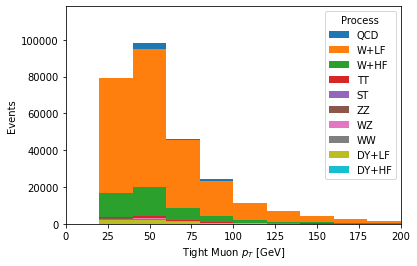

In [4]:
hist.plot1d(bkg_hists['mu_tight_pT'].integrate('region','wmcr'), overlay='process', stack=True)

In [13]:
for j in bkg_hists[key].identifiers('region'):
  print(j)

sre
srm
tecr
tmcr
wecr
wmcr


In [14]:
(bkg_hists['ele_pT'].integrate('region','wecr')[data['2018'][str('wecr')]]).integrate('process').values()

{}

mu_tight_pT 

dr_mu_lj 

ele_tight_pT 

jet_leading_eta 

ele_tight_eta 

mu_tight_eta 

recoil 

ndflvL 

njets 

dphi_e_etmiss 

dr_e_lj 

mT 

dphi_Met_LJ 

ndcsvM 

eT_miss 



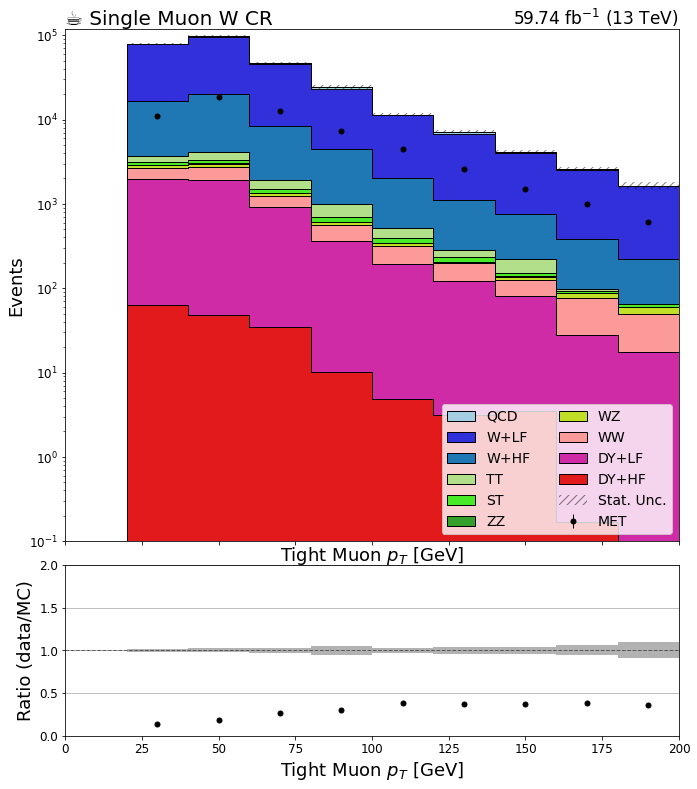

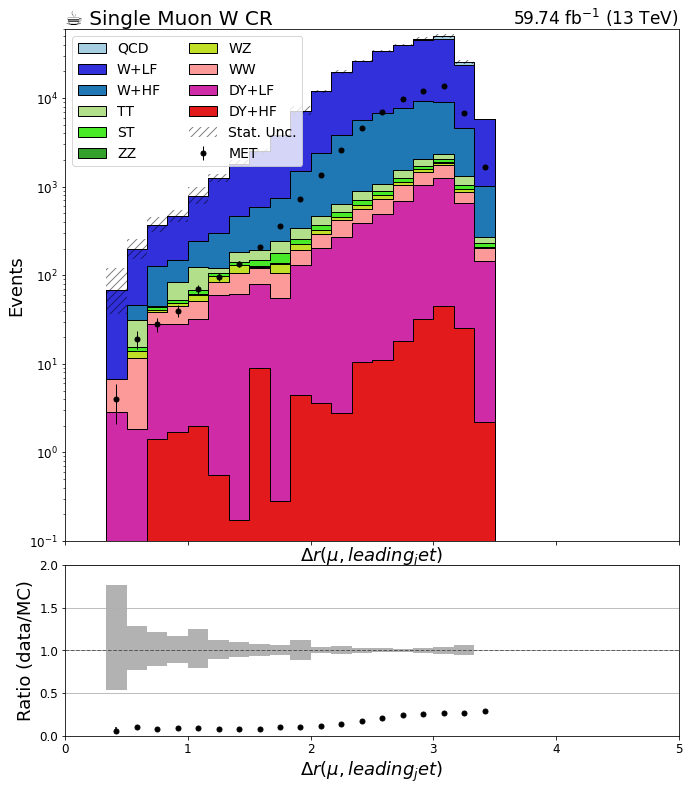

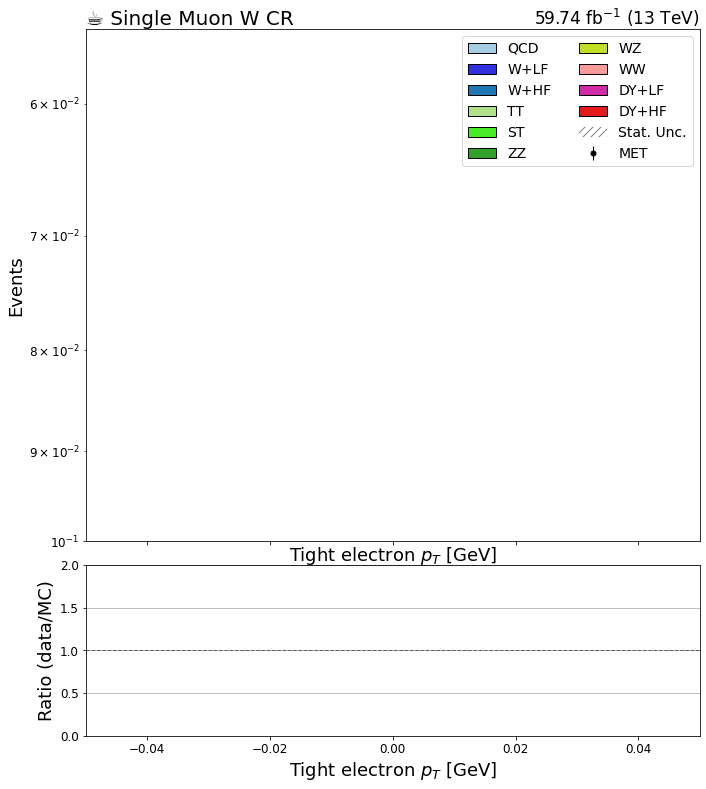

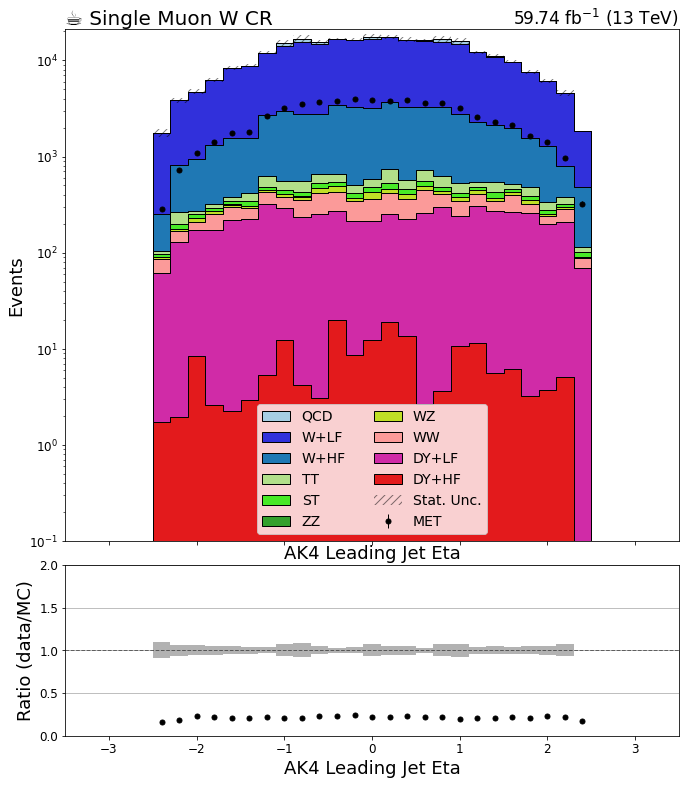

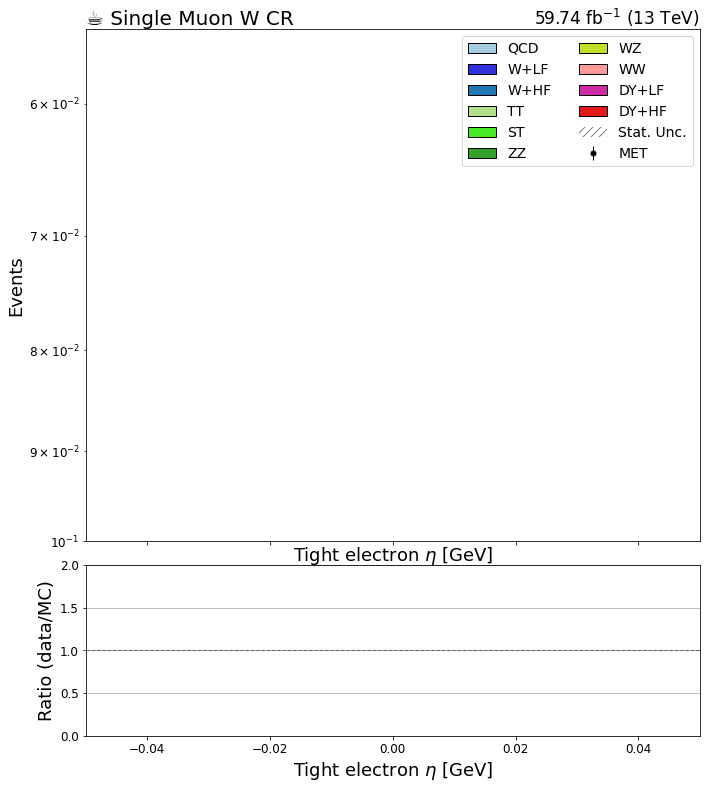

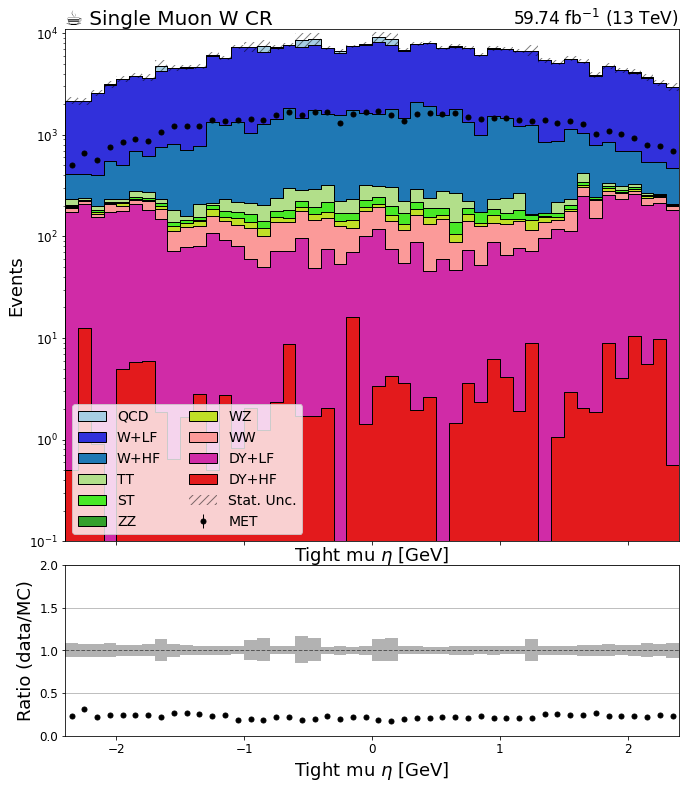

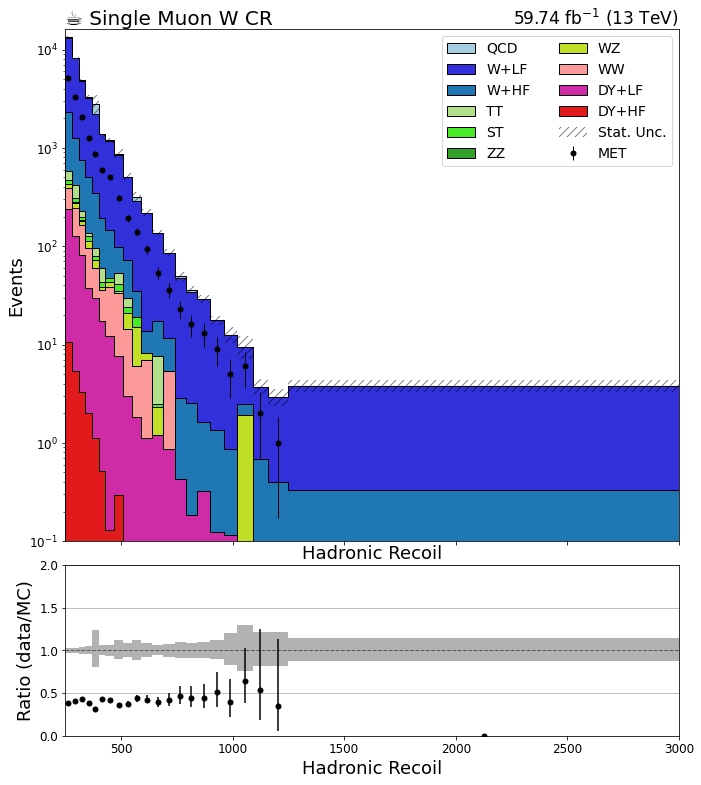

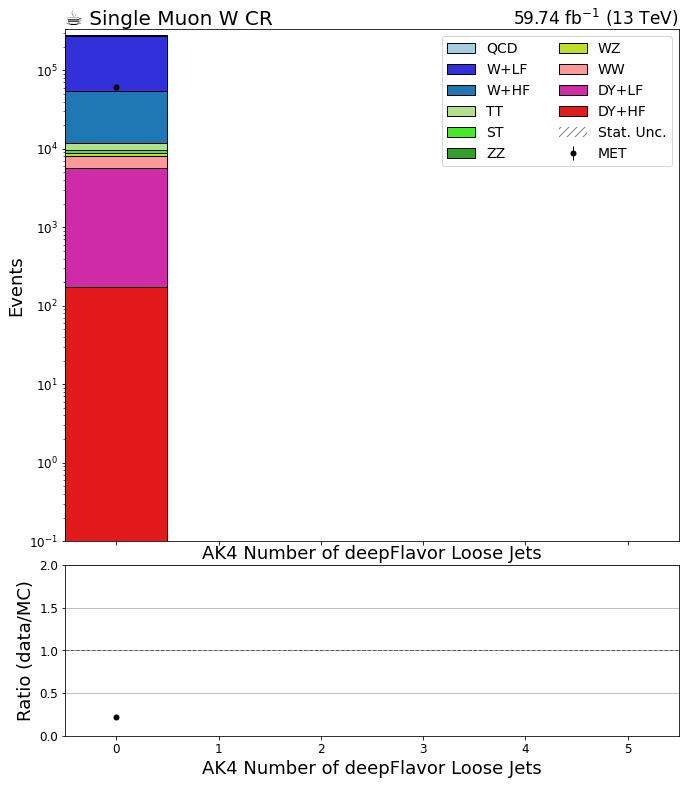

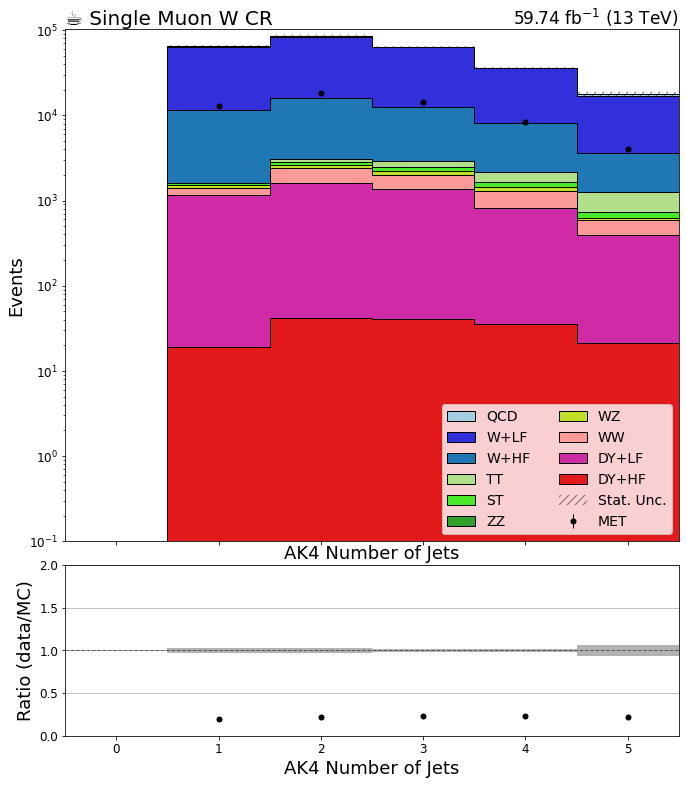

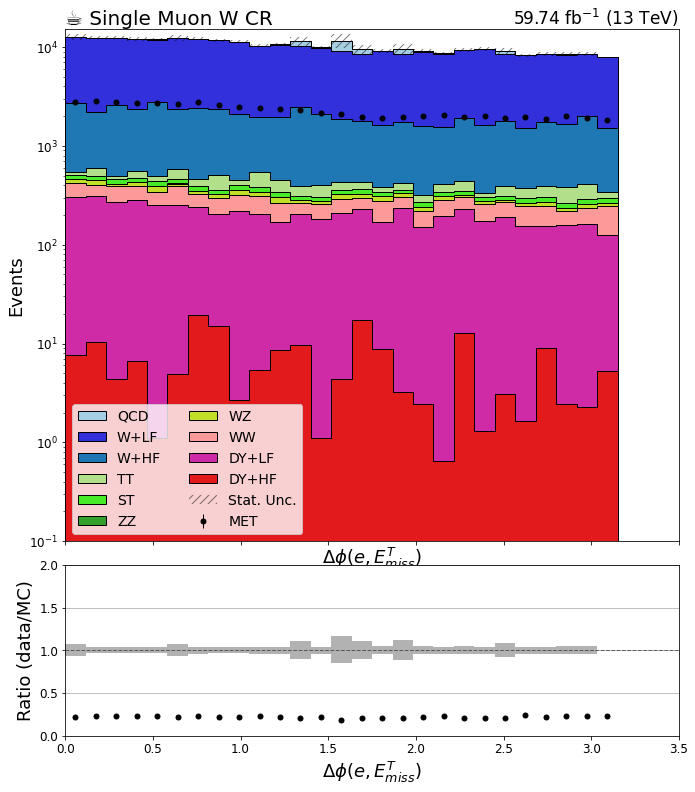

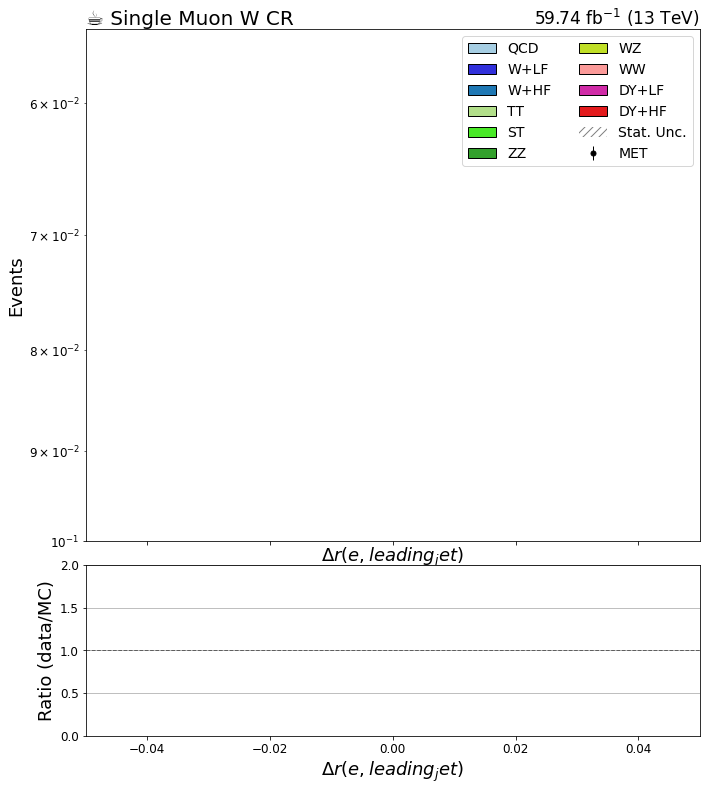

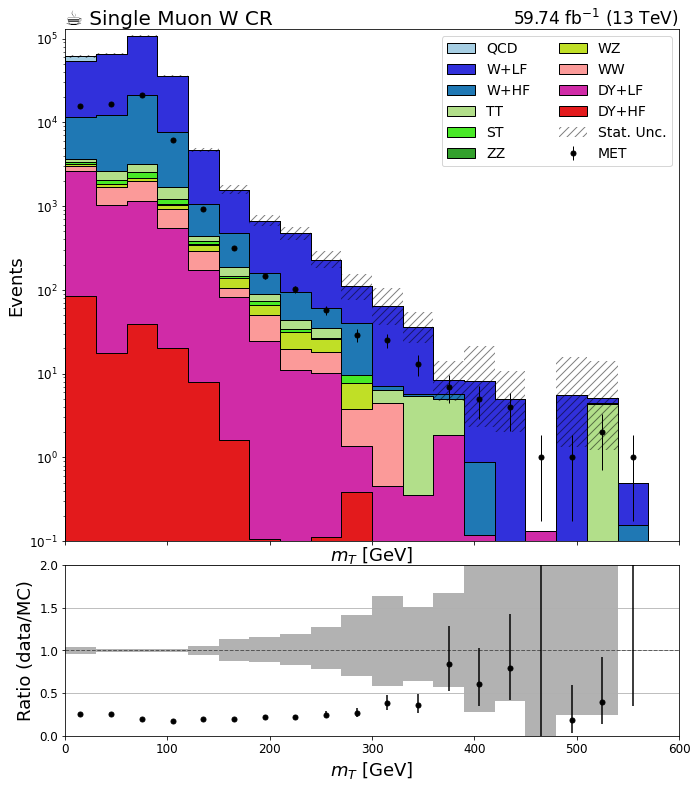

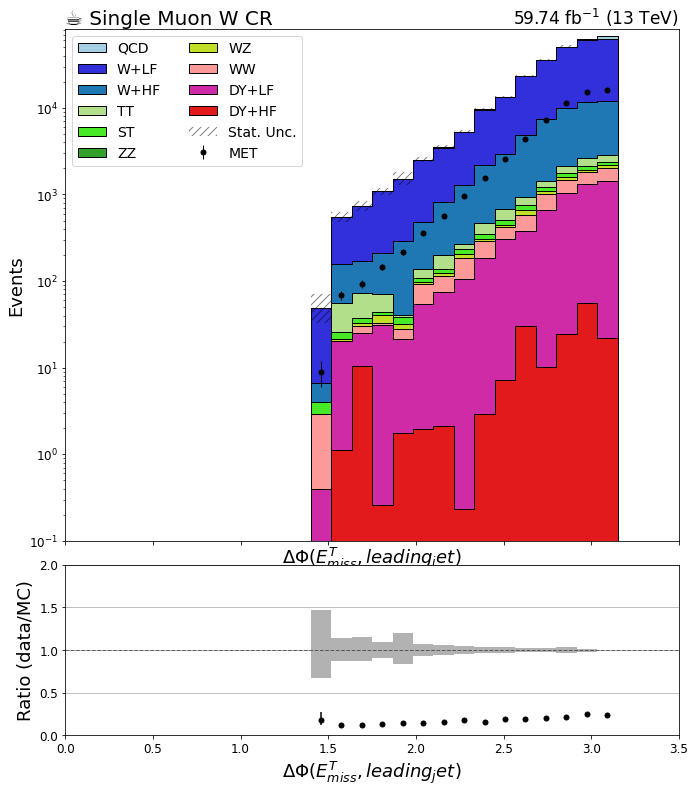

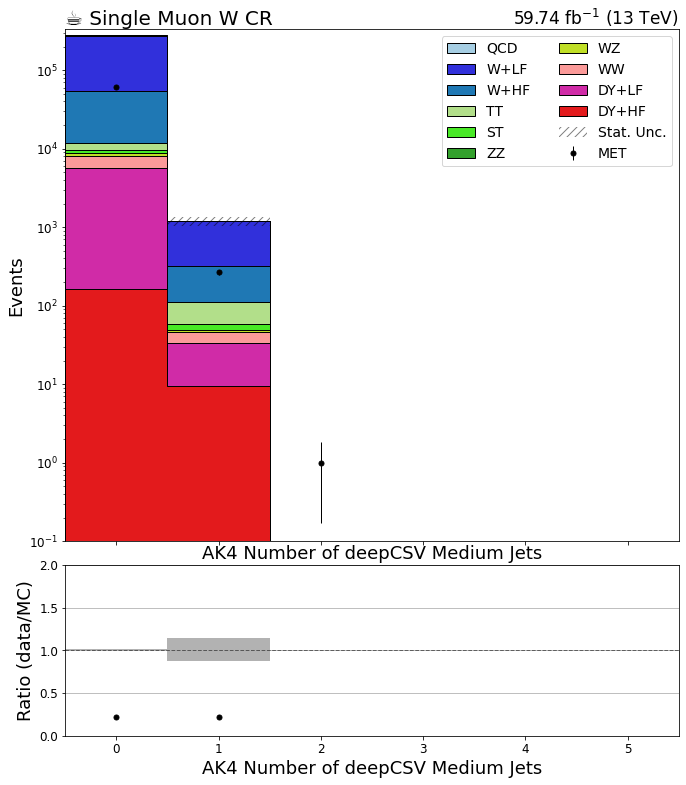

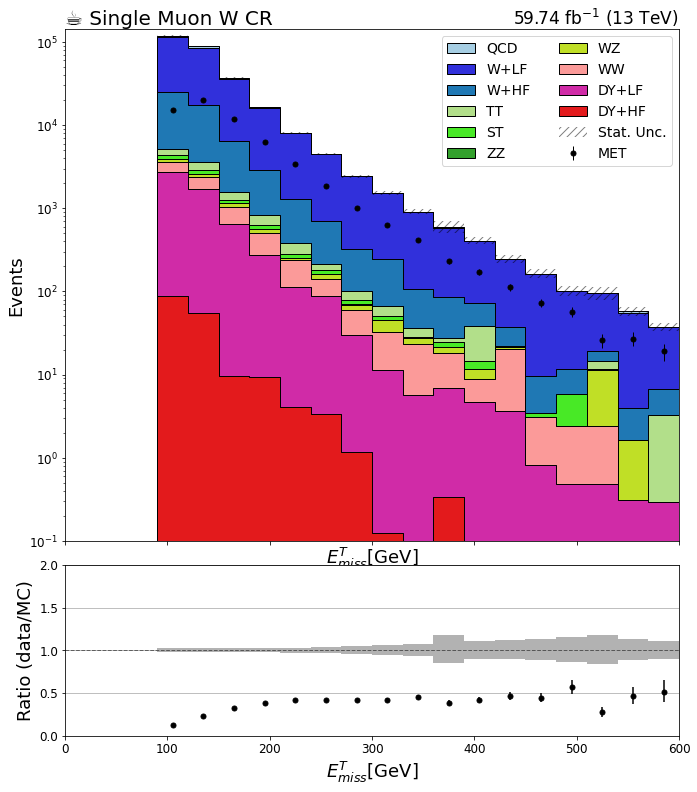

In [3]:
            def isolation(R):
                hadrons = gen[ #Stable hadrons not in NanoAOD, using quarks/glouns instead
                    ((abs(gen.pdgId)<=5)|(abs(gen.pdgId)==21)) &
                    gen.hasFlags(['fromHardProcess', 'isFirstCopy'])
                ]
                genhadrons = gen.cross(hadrons, nested=True)
                hadronic_et = genhadrons.i1[(genhadrons.i0.delta_r(genhadrons.i1) <= R)].pt.sum()
                return (hadronic_et<=(epsilon_0_dyn * gen.pt * np.power((1 - np.cos(R)) / (1 - np.cos(gen.R_0_dyn)), n_dyn))) | (hadrons.counts==0)

            isIsoA=gen.isA
            iterations = 5.
            for i in range(1, int(iterations) + 1):
                isIsoA=isIsoA&isolation(gen.R_0_dyn*i/iterations)
            gen['isIsoA']=isIsoA

            #genWs = gen[gen.isW&(gen.pt>=100)]
            genWs = gen[gen.isW] 
            genZs = gen[gen.isZ]
            genDYs = gen[gen.isZ&(gen.mass>30)]
            genIsoAs = gen[gen.isIsoA] 

            nnlo_nlo = {}
            nlo_qcd = np.ones(events.size)
            nlo_ewk = np.ones(events.size)
            if('GJets' in dataset): 
                if self._year=='2016':
                    nlo_qcd = get_nlo_qcd_weight['a'](genIsoAs.pt.max())
                    nlo_ewk = get_nlo_ewk_weight['a'](genIsoAs.pt.max())
                for systematic in get_nnlo_nlo_weight['a']:
                    nnlo_nlo[systematic] = get_nnlo_nlo_weight['a'][systematic](genIsoAs.pt.max())*((genIsoAs.counts>0)&(genIsoAs.pt.max()>=290)) + \
                                           get_nnlo_nlo_weight['a'][systematic](290)*((genIsoAs.counts>0)&~(genIsoAs.pt.max()>=290)&(genIsoAs.pt.max()>=100)) + \
                                           (~((genIsoAs.counts>0)&(genIsoAs.pt.max()>=100))).astype(np.int)
            elif('WJets' in dataset): 
                nlo_qcd = get_nlo_qcd_weight['w'](genWs.pt.max())
                nlo_ewk = get_nlo_ewk_weight['w'](genWs.pt.max())
                for systematic in get_nnlo_nlo_weight['w']:
                    nnlo_nlo[systematic] = get_nnlo_nlo_weight['w'][systematic](genWs.pt.max())*((genWs.counts>0)&(genWs.pt.max()>=100)) + \
                                           (~((genWs.counts>0)&(genWs.pt.max()>=100))).astype(np.int)
            elif('DY' in dataset): 
                nlo_qcd = get_nlo_qcd_weight['dy'](genDYs.pt.max())
                nlo_ewk = get_nlo_ewk_weight['dy'](genDYs.pt.max())
                for systematic in get_nnlo_nlo_weight['dy']:
                    nnlo_nlo[systematic] = get_nnlo_nlo_weight['dy'][systematic](genDYs.pt.max())*((genDYs.counts>0)&(genDYs.pt.max()>=100)) + \
                                           (~((genDYs.counts>0)&(genDYs.pt.max()>=100))).astype(np.int)
            elif('ZJets' in dataset): 
                nlo_qcd = get_nlo_qcd_weight['z'](genZs.pt.max())
                nlo_ewk = get_nlo_ewk_weight['z'](genZs.pt.max())
                for systematic in get_nnlo_nlo_weight['z']:
                    nnlo_nlo[systematic] = get_nnlo_nlo_weight['z'][systematic](genZs.pt.max())*((genZs.counts>0)&(genZs.pt.max()>=100)) + \
                                           (~((genZs.counts>0)&(genZs.pt.max()>=100))).astype(np.int)